In [1]:
import pickle
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

%matplotlib inline

In [2]:
def read_pickle(filename):
    infile = open(filename,'rb')
    dict_data = pickle.load(infile)
    infile.close()
    return dict_data

In [3]:
def write_pickle(dict_data, filename):
    pickling_on = open(filename+'.pickle',"wb")
    pickle.dump(dict_data, pickling_on)
    pickling_on.close()
    print('saved file')

In [4]:
gurobi_results_5 = []
gurobi_results_15 = []

name_list = [[40,1], [60,1], [60,2], [80,1], [80,2], [80,3], [100,1], [100,2], [100,3], [120,1], [120,2], [120,3], [120,4]]

for name in name_list:
    file_name = "data/gurobi_results_size_" + str(name[0]) + "_unit_5_" + str(name[1]) + ".pickle"
    print(file_name)
    gurobi_data = read_pickle(file_name)
    gurobi_results_5.append(gurobi_data)

for name in name_list:
    file_name = "data/gurobi_results_size_" + str(name[0]) + "_unit_15_" + str(name[1]) + ".pickle"
    print(file_name)
    gurobi_data = read_pickle(file_name)
    gurobi_results_15.append(gurobi_data)

data/gurobi_results_size_40_unit_5_1.pickle
data/gurobi_results_size_60_unit_5_1.pickle
data/gurobi_results_size_60_unit_5_2.pickle
data/gurobi_results_size_80_unit_5_1.pickle
data/gurobi_results_size_80_unit_5_2.pickle
data/gurobi_results_size_80_unit_5_3.pickle
data/gurobi_results_size_100_unit_5_1.pickle
data/gurobi_results_size_100_unit_5_2.pickle
data/gurobi_results_size_100_unit_5_3.pickle
data/gurobi_results_size_120_unit_5_1.pickle
data/gurobi_results_size_120_unit_5_2.pickle
data/gurobi_results_size_120_unit_5_3.pickle
data/gurobi_results_size_120_unit_5_4.pickle
data/gurobi_results_size_40_unit_15_1.pickle
data/gurobi_results_size_60_unit_15_1.pickle
data/gurobi_results_size_60_unit_15_2.pickle
data/gurobi_results_size_80_unit_15_1.pickle
data/gurobi_results_size_80_unit_15_2.pickle
data/gurobi_results_size_80_unit_15_3.pickle
data/gurobi_results_size_100_unit_15_1.pickle
data/gurobi_results_size_100_unit_15_2.pickle
data/gurobi_results_size_100_unit_15_3.pickle
data/gurobi_r

In [5]:
dict_data = {}
dict_data['other_test_data'] = gurobi_results_5[0]['other_test_data']

dict_data['tasksets'] = {}
dict_data['results'] = {}
dict_data['heuristic_profit'] = {}
# dict_data['gurobi_time_limit'] = {}
dict_data['heuristic_num_offloaded'] = {}
dict_data['gurobi_profit_5'] = {}
dict_data['gurobi_runtime_5'] = {}
dict_data['gurobi_num_offloaded_5'] = {}



for dict1 in gurobi_results_5:
    for ID in dict1['tasksets'].keys():
        dict_data['tasksets'][ID] = dict1['tasksets'][ID]
        
    for ID in dict1['results'].keys():
        dict_data['results'][ID] = dict1['results'][ID]
        
    for ID in dict1['heuristic_profit'].keys():
        dict_data['heuristic_profit'][ID] = dict1['heuristic_profit'][ID]
        
    for ID in dict1['heuristic_num_offloaded'].keys():
        dict_data['heuristic_num_offloaded'][ID] = dict1['heuristic_num_offloaded'][ID]
        
    for ID in dict1['gurobi_profit'].keys():
        dict_data['gurobi_profit_5'][ID] = dict1['gurobi_profit'][ID]
        
    for ID in dict1['gurobi_runtime'].keys():
        dict_data['gurobi_runtime_5'][ID] = dict1['gurobi_runtime'][ID]
        
    for ID in dict1['gurobi_num_offloaded'].keys():
        dict_data['gurobi_num_offloaded_5'][ID] = dict1['gurobi_num_offloaded'][ID]

In [6]:
dict_data['gurobi_profit_15'] = {}
dict_data['gurobi_runtime_15'] = {}
dict_data['gurobi_num_offloaded_15'] = {}

for dict3 in gurobi_results_15:
    
    for ID in dict3['gurobi_profit'].keys():
        dict_data['gurobi_profit_15'][ID] = dict3['gurobi_profit'][ID]
        dict_data['gurobi_runtime_15'][ID] = dict3['gurobi_runtime'][ID]
        dict_data['gurobi_num_offloaded_15'][ID] = dict3['gurobi_num_offloaded'][ID]

### Note: We have copied dictionaries. There could be cross-copying between 4-4.2 and 5-5.2 <br>so do not change any values 

In [7]:
len(dict_data['results'].keys())

12000

In [8]:
heuristic_mean = sum(dict_data["heuristic_profit"].values())/len(dict_data["heuristic_profit"].values())
print(heuristic_mean)

gurobi_profit_sum = sum(dict_data["gurobi_profit_5"].values()) + sum(dict_data["gurobi_profit_15"].values())
gurobi_mean = gurobi_profit_sum/(len(dict_data["gurobi_profit_5"].values()) * 2)
print(gurobi_mean)

(gurobi_mean - heuristic_mean)/heuristic_mean

3949.269333333333
3750.3537112282365


-0.05036770230537919

In [9]:
# id_comp = {('0','10'):[], ('10','20'):[], ('20','30'):[], ('30','40'):[], ('40','50'):[], ('50','60'):[],\
#            ('60','70'):[], ('70','80'):[], ('80','90'):[], ('90','100'):[]}
id_comp = {"[0, 25)":[], "[25, 50)":[], "[50, 75)":[], "[75, 100]":[]}


# id_bdwth = {('0','10'):[], ('10','20'):[], ('20','30'):[], ('30','40'):[], ('40','50'):[], ('50','60'):[],\
#            ('60','70'):[], ('70','80'):[], ('80','90'):[], ('90','100'):[]}
id_bdwth = {"[0, 25)":[], "[25, 50)":[], "[50, 75)":[], "[75, 100]":[]}

id_num_tasks = {'40':[], '60':[], '80':[], '100':[], '120':[]}

for ID in dict_data['results'].keys():
    p_c = dict_data['results'][ID]['percent_comp_int']
    p_b = dict_data['results'][ID]['percent_bdwth_int']

    if p_c >= 75:
        id_comp["[75, 100]"].append(ID)
    elif p_c >= 50:
        id_comp["[50, 75)"].append(ID)
    elif p_c >= 25:
        id_comp["[25, 50)"].append(ID)
    else:
        id_comp["[0, 25)"].append(ID)

    if p_b >= 75:
        id_bdwth["[75, 100]"].append(ID)
    elif p_b >= 50:
        id_bdwth["[50, 75)"].append(ID)
    elif p_b >= 25:
        id_bdwth["[25, 50)"].append(ID)
    else:
        id_bdwth["[0, 25)"].append(ID)
            
    for key in id_num_tasks:
        if dict_data['results'][ID]['num_tasks'] == int(key):
            id_num_tasks[key].append(ID)

In [10]:
print('Number of Instances split by compute intensiveness:')
for key in id_comp.keys():
    print(key+': ', end='')
    print(len(id_comp[key]))
print()

print('Number of Instances split by bdwth intensiveness:')
for key in id_bdwth.keys():
    print(key+': ', end='')
    print(len(id_bdwth[key]))
print() 

Number of Instances split by compute intensiveness:
[0, 25): 3720
[25, 50): 2911
[50, 75): 3166
[75, 100]: 2203

Number of Instances split by bdwth intensiveness:
[0, 25): 5472
[25, 50): 4359
[50, 75): 2052
[75, 100]: 117



In [11]:
# Checking

sume=0
for key in id_comp:
    sume += len(id_comp[key])
print(sume)
sume=0
for key in id_bdwth:
    sume += len(id_bdwth[key])
print(sume)
sume=0
for key in id_num_tasks:
    sume += len(id_num_tasks[key])
print(sume)

12000
12000
12000


In [12]:
dict_data.keys()

dict_keys(['other_test_data', 'tasksets', 'results', 'heuristic_profit', 'heuristic_num_offloaded', 'gurobi_profit_5', 'gurobi_runtime_5', 'gurobi_num_offloaded_5', 'gurobi_profit_15', 'gurobi_runtime_15', 'gurobi_num_offloaded_15'])

#### Compute Intensiveness

In [13]:
data_comp_int = {'fraction of total profit': [], 'Algorithm': [], 'percentage of computation intensive tasks': []}

# id_comp = {"[0, 25)":[], "[25, 50)":[], "[50, 75)":[], "[75, 100]":[]}
for key in id_comp.keys():
    for ID in id_comp[key]:
        total_profit = sum(dict_data['tasksets'][ID]['G_i'].values())

        data_comp_int['fraction of total profit'].append(dict_data['heuristic_profit'][ID]/total_profit)
        data_comp_int['Algorithm'].append('ZSG')
        data_comp_int['percentage of computation intensive tasks'].append(key)
        
        data_comp_int['fraction of total profit'].append(dict_data['gurobi_profit_5'][ID]/total_profit)
        data_comp_int['Algorithm'].append('LDM-5')
        data_comp_int['percentage of computation intensive tasks'].append(key)
        
        # data_comp_int['profit'].append(dict_data['gurobi_profit_10'][ID])
        # data_comp_int['Algorithm'].append('gurobi unit 10')
        # data_comp_int['percentage of computation intensive tasks'].append(str(key[0])+'-'+str(key[1]))
        
        data_comp_int['fraction of total profit'].append(dict_data['gurobi_profit_15'][ID]/total_profit)
        data_comp_int['Algorithm'].append('LDM-15')
        data_comp_int['percentage of computation intensive tasks'].append(key)

In [14]:
df_comp_int = pd.DataFrame(data_comp_int)
df_comp_int.head()

,fraction of total profit,Algorithm,percentage of computation intensive tasks
0,1.0,ZSG,"[0, 25)"
1,1.0,LDM-5,"[0, 25)"
2,1.0,LDM-15,"[0, 25)"
3,1.0,ZSG,"[0, 25)"
4,1.0,LDM-5,"[0, 25)"


In [15]:
zsg_profit = df_comp_int[df_comp_int["Algorithm"] == "ZSG"]
zsg_mean = zsg_profit["fraction of total profit"].mean()
print("ZSG profit mean: ", zsg_mean)

ldm5_profit = df_comp_int[df_comp_int["Algorithm"] == "LDM-5"]
ldm5_mean = ldm5_profit["fraction of total profit"].mean()
print("LDM-5 profit mean: ", ldm5_mean)

ldm15_profit = df_comp_int[df_comp_int["Algorithm"] == "LDM-15"]
ldm15_mean = ldm15_profit["fraction of total profit"].mean()
print("LDM-15 profit mean: ", ldm15_mean)

# (gurobi_mean - zsg_mean) / zsg_mean * 100
print((ldm5_mean - zsg_mean) * 100)
print((ldm15_mean - zsg_mean) * 100)

print((ldm5_mean - ldm15_mean) * 100)

ZSG profit mean:  0.88500973583188
LDM-5 profit mean:  0.9102235395607218
LDM-15 profit mean:  0.8153086475635226
2.5213803728841744
-6.970108826835741
9.491489199719915


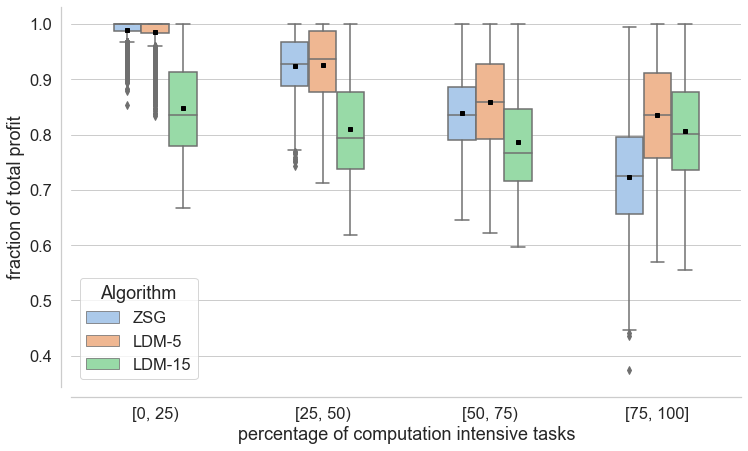

In [16]:
# Draw a nested boxplot to show bills by day and sex
# sns.boxplot(x="day", y="total_bill", hue="sex", data=tips, palette="PRGn", width=0.2)
# sns.despine(offset=10, trim=True)

sns.set(rc={'figure.figsize':(12,7)})
# sns.set()
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
boxplot_plot1 = sns.boxplot(x='percentage of computation intensive tasks', y= 'fraction of total profit', hue='Algorithm', data=df_comp_int, palette="pastel",width=0.5, showmeans=True,\
           meanprops={'marker':'s', "markerfacecolor":"black", "markeredgecolor":"black", "markersize": 4})
sns.despine(offset=10, trim=False)
# boxplot_plot1.set_xlabel("Percentage of computation intensive tasks", fontsize = 20)
# boxplot_plot1.set_ylabel("Profit", fontsize = 20)

fig = boxplot_plot1.get_figure()
plt.savefig('compute_intensive.pdf')

## Bandwidth Intensiveness

In [17]:
data_bdwth_int = {'fraction of total profit': [], 'Algorithm': [], 'percentage of bandwidth intensive tasks': []}

# id_bdwth = {"[0, 25)":[], "[25, 50)":[], "[50, 75)":[], "[75, 100]":[]}
for key in id_bdwth.keys():
        for ID in id_bdwth[key]:
            total_profit = sum(dict_data['tasksets'][ID]['G_i'].values())

            data_bdwth_int['fraction of total profit'].append(dict_data['heuristic_profit'][ID]/total_profit)
            data_bdwth_int['Algorithm'].append('ZSG')
            data_bdwth_int['percentage of bandwidth intensive tasks'].append(key)

            data_bdwth_int['fraction of total profit'].append(dict_data['gurobi_profit_5'][ID]/total_profit)
            data_bdwth_int['Algorithm'].append('LDM-5')
            data_bdwth_int['percentage of bandwidth intensive tasks'].append(key)

            data_bdwth_int['fraction of total profit'].append(dict_data['gurobi_profit_15'][ID]/total_profit)
            data_bdwth_int['Algorithm'].append('LDM-15')
            data_bdwth_int['percentage of bandwidth intensive tasks'].append(key)

In [18]:
df_bdwth_int = pd.DataFrame(data_bdwth_int)
df_bdwth_int.head()

,fraction of total profit,Algorithm,percentage of bandwidth intensive tasks
0,1.0,ZSG,"[0, 25)"
1,1.0,LDM-5,"[0, 25)"
2,1.0,LDM-15,"[0, 25)"
3,1.0,ZSG,"[0, 25)"
4,1.0,LDM-5,"[0, 25)"


In [19]:
zsg_profit2 = df_bdwth_int[df_bdwth_int["Algorithm"] == "ZSG"]
zsg_mean2 = zsg_profit2["fraction of total profit"].mean()
print("ZSG profit mean: ", zsg_mean2)

ldm5_profit2 = df_bdwth_int[df_bdwth_int["Algorithm"] == "LDM-5"]
ldm5_mean2 = ldm5_profit2["fraction of total profit"].mean()
print("LDM-5 profit mean: ", ldm5_mean2)

ldm15_profit2 = df_bdwth_int[df_bdwth_int["Algorithm"] == "LDM-15"]
ldm15_mean2 = ldm15_profit2["fraction of total profit"].mean()
print("LDM-15 profit mean: ", ldm15_mean2)

# (gurobi_mean2 - zsg_mean2) / zsg_mean2 * 100
print((ldm5_mean2 - zsg_mean2) * 100)
print((ldm15_mean2 - zsg_mean2) * 100)

ZSG profit mean:  0.8850097358318806
LDM-5 profit mean:  0.9102235395607248
LDM-15 profit mean:  0.815308647563518
2.5213803728844186
-6.970108826836263


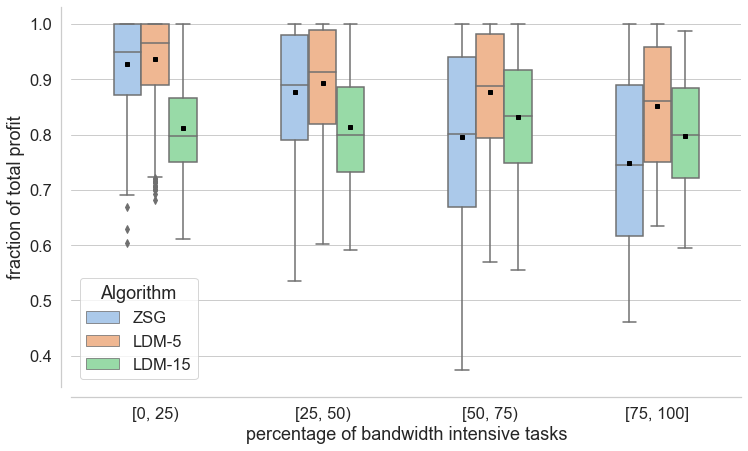

In [20]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")

# boxplot_plot1 = sns.boxplot(x='percentage of computation intensive tasks', y= 'fraction of total profit', hue='Algorithm', data=df_comp_int, palette="pastel",width=0.5, showmeans=True,
#                             meanprops={'marker':'s', "markerfacecolor":"black", "markeredgecolor":"black", "markersize": 3})
# sns.despine(offset=10, trim=False)

boxplot_plot2 = sns.boxplot(x='percentage of bandwidth intensive tasks',\
            y= 'fraction of total profit', hue='Algorithm', data=df_bdwth_int, palette="pastel", width=0.5, showmeans=True,
                            meanprops={'marker':'s', "markerfacecolor":"black", "markeredgecolor":"black", "markersize": 4})
sns.despine(offset=10, trim=False)

fig = boxplot_plot2.get_figure()
plt.savefig('bandwidth_intensive.pdf')

#### Number of Tasks

In [21]:
data_num_int = {'fraction of total profit': [], 'Algorithm': [], 'number of tasks': []}

for key in id_num_tasks.keys():
    
    for ID in id_num_tasks[key]:
        total_profit = sum(dict_data['tasksets'][ID]['G_i'].values())
        
        data_num_int['fraction of total profit'].append(dict_data['heuristic_profit'][ID]/total_profit)
        data_num_int['Algorithm'].append('ZSG')
        data_num_int['number of tasks'].append(str(key))

        data_num_int['fraction of total profit'].append(dict_data['gurobi_profit_5'][ID]/total_profit)
        data_num_int['Algorithm'].append('LDM-5')
        data_num_int['number of tasks'].append(str(key))
        
        # data_num_int['fraction of total profit'].append(dict_data['gurobi_profit_10'][ID]/total_profit)
        # data_num_int['Algorithm'].append('gurobi unit 10')
        # data_num_int['number of tasks'].append(str(key))
        
        data_num_int['fraction of total profit'].append(dict_data['gurobi_profit_15'][ID]/total_profit)
        data_num_int['Algorithm'].append('LDM-15')
        data_num_int['number of tasks'].append(str(key))

In [22]:
df_num_int = pd.DataFrame(data_num_int)
df_num_int.head()

,fraction of total profit,Algorithm,number of tasks
0,1.0,ZSG,40
1,1.0,LDM-5,40
2,1.0,LDM-15,40
3,1.0,ZSG,40
4,1.0,LDM-5,40


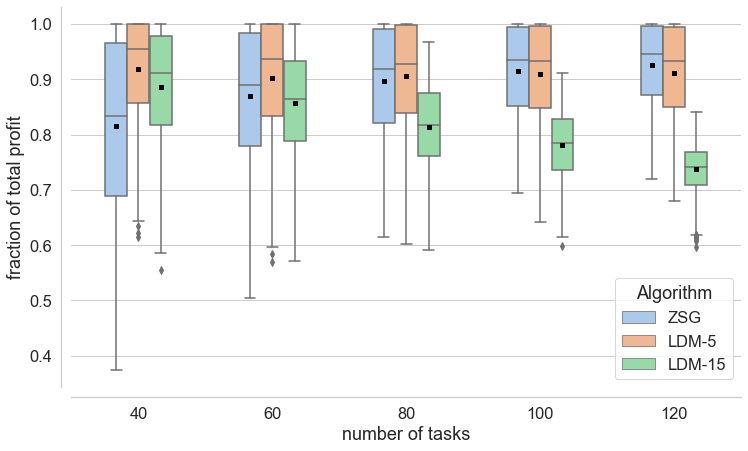

In [23]:
sns.set(rc={'figure.figsize':(12,7)})
sns.set(font_scale = 1.5)
sns.set_style("whitegrid")
boxplot_plot3 = sns.boxplot(x='number of tasks', y= 'fraction of total profit', hue='Algorithm', data=df_num_int, palette="pastel", width=0.5, showmeans=True,
                            meanprops={'marker':'s', "markerfacecolor":"black", "markeredgecolor":"black", "markersize": 4})
sns.despine(offset=10, trim=False)

fig = boxplot_plot3.get_figure()
plt.savefig('num_tasks_intensive.pdf')